<a href="https://colab.research.google.com/github/snoop2head/OIA_Text_Wrangling/blob/master/_Department_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
print(pd.__version__)
print(np.__version__)

1.1.0
1.18.5


In [2]:
file_name = "department_data.csv"
path = "data_wrangled/" + file_name
df = pd.read_csv(path)
# 데이터의 크기가 어느정도인지 본다.
print(df.shape)
df.sample(5)

(469, 5)


,대학코드,대학명,NUM_VISITS,NUM_DEP,VAR
255,SG000002,National University of Singapore,101,43,22.134127
205,JP000032,University of the Ryukyus,1,1,0.000000
306,US000048,Clemson University,1,1,0.000000
3,AT000003,Karl-Franzens-Universitat Graz,7,7,0.000000
4,AT000006,Vienna University of Economics and Business,46,15,27.795556


In [3]:
df_data = df.loc[df["NUM_VISITS"]>=6]
df_data.sample(5)

,대학코드,대학명,NUM_VISITS,NUM_DEP,VAR
360,US000132,Northwest Missouri State University,8,5,0.640000
169,IT000001,Bocconi University,60,17,49.425606
12,AU000005,La Trobe University,22,13,1.751479
313,US000057,Dartmouth College,16,14,0.122449
40,CA000015,University of Toronto,108,47,7.613400


In [4]:
columns_dropping = ["대학코드", "대학명"]
data = df_data.drop(columns=columns_dropping)
data[:5]

,NUM_VISITS,NUM_DEP,VAR
1,40,10,25.600000
3,7,7,0.000000
4,46,15,27.795556
5,13,4,6.187500
6,11,9,0.172840


In [5]:
columns_df = list(df.columns)
columns_data = [column for column in columns_df if column not in columns_dropping]
columns_data

['NUM_VISITS', 'NUM_DEP', 'VAR']

In [6]:
# 정규화
transformer = MinMaxScaler(feature_range=(0, 1))
transformer.fit(data)
x_data = transformer.transform(data)

In [7]:
pd.DataFrame(x_data, columns=columns_data).corr()

,NUM_VISITS,NUM_DEP,VAR
NUM_VISITS,1.000000,0.915019,0.555216
NUM_DEP,0.915019,1.000000,0.328120
VAR,0.555216,0.328120,1.000000


### Variance, Num_visit, Num_dep 갖고 산출한 cluster
종합대, 단과대 라벨이 없기 때문에 비지도학습 기법인 Kmeans Clustering을 진행함.

- 0번 그룹: 전공의 편향도가 높은 그룹, 학생수가 어느 정도 있음
- 1번 그룹: 전공의 편향도가 낮은 그룹, 학생수가 매우 많음
- 2번 그룹: 전공의 편향도가 높은 그룹, 그리고 학생이 적음
- 3번 그룹: 전공의 편향도가 낮고, 학생수가 많음

KElbowVisualizer(ax=<AxesSubplot:>, k=None, model=None)

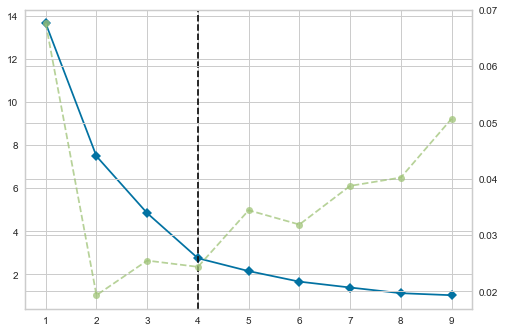

In [8]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(x_data)

In [9]:
# 4개 군집으로 진행
no_clusters = 4
model = KMeans(n_clusters=no_clusters, random_state=307)
model.fit(x_data)

KMeans(n_clusters=4, random_state=307)

In [10]:
cluster_mean = pd.DataFrame(model.cluster_centers_, columns=columns_data)
cluster_mean

,NUM_VISITS,NUM_DEP,VAR
0,0.145507,0.274379,0.043783
1,0.718387,0.670438,0.417782
2,0.027614,0.080750,0.017778
3,0.104137,0.092603,0.393517


In [11]:
df_data['category'] = model.labels_

In [12]:
df_data['category'].value_counts()

2    199
0     73
3     17
1      7
Name: category, dtype: int64

In [13]:
df_data[df_data['category'] == 1]

,대학코드,대학명,NUM_VISITS,NUM_DEP,VAR,category
380,US000172,SUNY at Albany,235,55,81.143802,1
391,US000188,University of California Berkeley,424,103,73.093223,1
393,US000190,University of California Irvine,335,77,94.695227,1
394,US000191,University of California Los Angeles,314,70,54.992653,1
396,US000193,University of California Santa Barbara,358,69,80.964503,1
398,US000195,University of California San Diego,290,70,58.522449,1
437,US000250,University of Washington,188,44,87.334711,1


In [14]:
print("단과대일 수도 있습니다. 본인 전공 수업이 열리는지 잘 확인하세요" , list(df_data[df_data['category'] == 3]["대학코드"].values))

단과대일 수도 있습니다. 본인 전공 수업이 열리는지 잘 확인하세요 ['CA000013', 'CA000020', 'DE000002', 'DE000003', 'ES000001', 'FI000014', 'FR000002', 'IT000001', 'NL000001', 'NL000006', 'NL000010', 'RU000002', 'RU000003', 'SE000001', 'SG000003', 'US000046', 'US000123']


In [15]:
pca = PCA(n_components=2)
pca_fit = pca.fit(x_data)

In [16]:
pca_result = pd.DataFrame(data=pca.fit_transform(x_data))

In [17]:
pca_result['category'] = model.labels_

In [18]:
pca_result[:5]

,0,1,category
0,-0.004694,0.104660,2
1,-0.131490,0.000542,2
2,0.041696,0.091612,2
3,-0.127949,0.042853,2
4,-0.112039,-0.008487,2


In [19]:
pca_result = pca_result.rename(columns={0:'pca1', 1:'pca2'})

In [20]:
# randomly assign colors to the dot
import random
color_lists = []
for i in range(no_clusters):
    color = "%06x" % random.randint(0, 0xFFFFFF)
    color_code = "#" + color
    color_lists.append(color_code)
color_lists

['#057f41', '#a2b0d2', '#0403a8', '#83a3e5']

<AxesSubplot:xlabel='pca1', ylabel='pca2'>

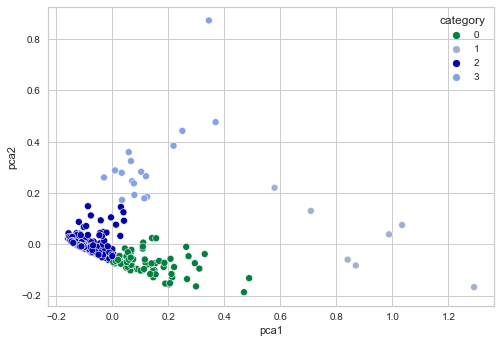

In [21]:
import seaborn as sns
sns.scatterplot(data=pca_result, x='pca1', y='pca2', hue='category', palette=color_lists)